In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [2]:
path = 'Sinhala_Singlish_Hate_Speech.csv'
df = pd.read_csv(path)
df.head()

,PhraseNo,Phrase,IsHateSpeech
0,1,මේ බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ නැ...,YES
1,2,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් එක්ක සෙල්ෆියක් ගත්ත...,YES
2,3,සංහිදියාවට අවුලක් වෙයි ද,NO
3,4,.කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා...,YES
4,5,මචන් ඔය මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන...,YES


In [3]:
##removing unwanted column
df = df.drop(['PhraseNo'], axis=1)
df.head()

,Phrase,IsHateSpeech
0,මේ බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ නැ...,YES
1,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් එක්ක සෙල්ෆියක් ගත්ත...,YES
2,සංහිදියාවට අවුලක් වෙයි ද,NO
3,.කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා...,YES
4,මචන් ඔය මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන...,YES


In [4]:
## Exploratory Data Analysis¶

In [5]:
print('found %s datas'% len(df))

found 2500 datas


In [6]:
df['IsHateSpeech'].value_counts()

NO     1397
YES    1103
Name: IsHateSpeech, dtype: int64

In [7]:
##renaming the columns
df = df.rename(columns={'Phrase': 'text', 'IsHateSpeech': 'label'})

In [8]:
df.head()

,text,label
0,මේ බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ නැ...,YES
1,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් එක්ක සෙල්ෆියක් ගත්ත...,YES
2,සංහිදියාවට අවුලක් වෙයි ද,NO
3,.කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා...,YES
4,මචන් ඔය මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන...,YES


In [9]:
##renaming the column values
df['label'] = df['label'].map({'YES': 'Hate Speech', 'NO': 'Non-Hate Speech'})

In [10]:
df.head()

,text,label
0,මේ බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ නැ...,Hate Speech
1,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් එක්ක සෙල්ෆියක් ගත්ත...,Hate Speech
2,සංහිදියාවට අවුලක් වෙයි ද,Non-Hate Speech
3,.කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා...,Hate Speech
4,මචන් ඔය මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන...,Hate Speech


In [11]:
# Preprocessing

In [12]:
df = df.groupby('label').head(1000)

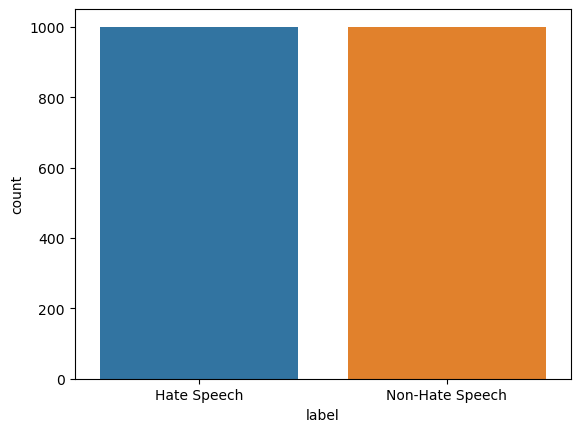

In [13]:
df_label = sns.countplot(x='label', data=df)
df_label.set_xticklabels(df['label'].unique())
plt.show()

In [14]:
df['label'].value_counts()

Hate Speech        1000
Non-Hate Speech    1000
Name: label, dtype: int64

In [15]:
#Feature Extraction using TF-IDF

In [16]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text'])
y = df['label']

In [17]:
#train test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#Build Model
#Naive Bayes

In [20]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

MultinomialNB()

In [21]:
pred_nb = clf_nb.predict(X_test)

In [22]:
import pickle
with open('my_model.pkl', 'wb') as f:
     pickle.dump(clf_nb, f)

In [23]:
f = open('my_model.pkl', 'rb')  # 'r' for reading; can be omitted
mod = pickle.load(f)

In [24]:
#Evaluation

In [25]:
#Printing of Naive Bayes Report 

In [26]:
print(classification_report(y_test,pred_nb))

                 precision    recall  f1-score   support

    Hate Speech       0.75      0.71      0.73       217
Non-Hate Speech       0.67      0.72      0.70       183

       accuracy                           0.71       400
      macro avg       0.71      0.71      0.71       400
   weighted avg       0.71      0.71      0.71       400



In [27]:
text = ['පලයං හුත්තෝ']
text_features = tfidf.transform (text)
predictions = mod.predict (text_features)
predictions

array(['Hate Speech'], dtype='<U15')